In [2]:
import bagpy
from bagpy import bagreader
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from functools import reduce
from scipy.spatial.transform import Rotation
import ipympl

%matplotlib widget


In [3]:
sns.set_theme()
# LaTex must be installed for this to work
# sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended cm-super

plt.rcParams['text.usetex'] = True
plt.rc('text.latex', preamble=r'\usepackage{bm}')

def drop_columns_in_df(df):
    return df.drop(columns=["header.seq", "header.stamp.secs", "header.stamp.nsecs", "header.frame_id"])

def rename_columns(df, new_colum_names: list):
    column_names = ['Time'] + new_colum_names
    
    df.columns= column_names

    return df

def normalize_df_time(df):
    start_time = df['Time'].iloc[0]

    df['Time'] -= start_time

    return df

def sync_dfs_based_on_time(dataframes: list):
    df_merged = reduce(lambda left,right: pd.merge_asof(left, right, on="Time", allow_exact_matches=True, direction="nearest", tolerance=0.01), dataframes)

    return df_merged

def df_from_pose_to_euler(df):
    quat_df = df[['pose.orientation.x', 'pose.orientation.y', 'pose.orientation.z', 'pose.orientation.w']]
    rot = Rotation.from_quat(quat_df)
    rot_euler = rot.as_euler('xyz', degrees=True)
    euler_df = pd.DataFrame(data=rot_euler, columns=['roll', 'pitch', 'yaw'])

    conc = [df, euler_df]

    df_gt_euler = pd.concat(
        conc,
        axis=1,
        join="outer",
        ignore_index=False,
        keys=None,
        levels=None,
        names=None,
        verify_integrity=False,
        copy=True,
    )

    df_gt_euler = drop_columns_in_df(df_gt_euler)
    df_gt_euler.drop(columns=["pose.position.x", "pose.position.y", "pose.position.z", "pose.orientation.x", "pose.orientation.y","pose.orientation.z","pose.orientation.w"], inplace=True)

    return df_gt_euler

In [66]:
b = bagreader('/home/simenallum/catkin_ws/src/msc_thesis/offline_utils/bagfile_creation//DJI_0003.bag')

b.topic_table

[INFO]  Successfully created the data folder /home/simenallum/catkin_ws/src/msc_thesis/offline_utils/bagfile_creation//DJI_0003.


,Topics,Types,Message Count,Frequency
0,/compass_heading,std_msgs/Float32,385,29.540265
1,/gimbal_heading,std_msgs/Float32,385,29.540265
2,/gimbal_pitch,std_msgs/Float32,385,29.540265
3,/gps_data,sensor_msgs/NavSatFix,385,29.540265
4,/image,sensor_msgs/Image,385,29.540265
5,/velocity,geometry_msgs/TwistStamped,385,29.540265


,Time,data
0,0.000000,226.300003
1,0.033852,226.300003
2,0.067705,226.300003
3,0.101557,226.300003
4,0.135409,226.300003
...,...,...
380,12.863913,166.199997
381,12.897766,166.199997
382,12.931618,166.199997
383,12.965470,166.199997


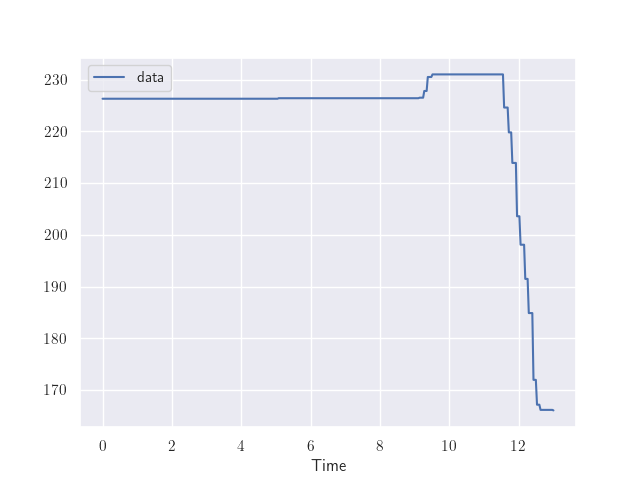

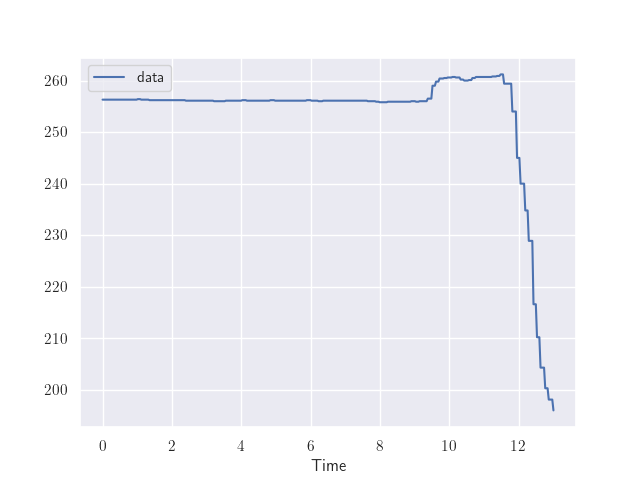

In [67]:
gimbal_heading = b.message_by_topic('/gimbal_heading')
df_gimbal_heading = pd.read_csv(gimbal_heading)

compass_heading = b.message_by_topic('/compass_heading')
df_compass_heading = pd.read_csv(compass_heading)

df_gimbal_heading = normalize_df_time(df_gimbal_heading)
df_gimbal_heading.plot(x="Time", y="data")

df_compass_heading = normalize_df_time(df_compass_heading)
df_compass_heading.plot(x="Time", y="data")

df_gimbal_heading

,Time,data
0,0.000000,83.400002
1,0.033852,83.400002
2,0.067705,83.400002
3,0.101557,83.400002
4,0.135409,83.400002
...,...,...
380,12.863913,88.000000
381,12.897766,88.000000
382,12.931618,88.000000
383,12.965470,88.000000


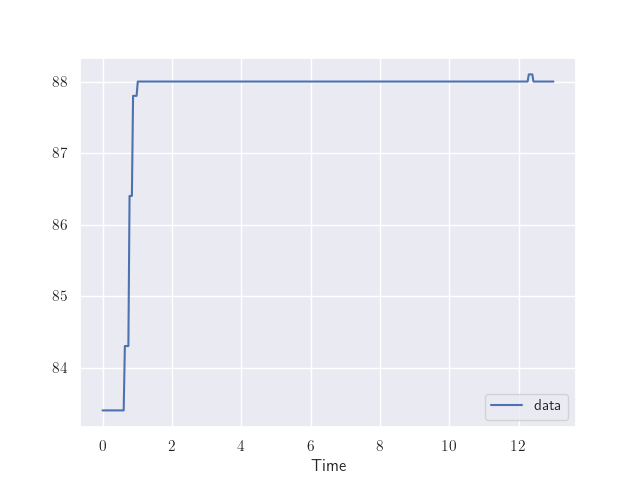

In [68]:
gimbal_heading = b.message_by_topic('/gimbal_pitch')
df_gimbal_heading = pd.read_csv(gimbal_heading)

df_gimbal_heading = normalize_df_time(df_gimbal_heading)
df_gimbal_heading.plot(x="Time", y="data")

df_gimbal_heading